In [198]:
import numpy as np
from math import e, ceil, log, sin, inf, pi
import random
import matplotlib.pyplot  as plt

In [199]:
f = lambda x1, x2: np.e**np.sin(x1**2)+x2

In [200]:
a_x1 = -2
b_x1 = 2

a_x2 = 0
b_x2 = 1

In [308]:
N = 50
N_t = 3
p_m = 0.1
p_c = 0.8
max_t = 100
max_t_nc = 20
h = 1e-3
q = 0.1
rr = 10

In [202]:
find_power_of_2 = lambda a, b, h: ceil( log( (b-a)/h, 2 ) )

In [203]:
def rand_ind(p):
    ind = ""
    for i in range(p):
        temp = str(random.randint(0, 1))
        ind += temp 
    return(ind)

In [204]:
def M(x, a, b, n):
    x_r = x[::-1]
    k = (b-a)/(2**n-1)
    s = 0
    for i in range(n):
        s += 2**i * int(x_r[i])
    return a + k*s

In [205]:
def eval_P(P, a1, b1, a2, b2, m1, m2, N):
    best_ind = 0
    res = 0
    eval_P = inf
    for i in range(N):
        temp1 = M(P[i][:m1-1], a1, b1, m1-1)
        temp2 = M(P[i][m2+1:], a2, b2, m2-1)
        if -f(temp1, temp2) < eval_P:
            res = (temp1, temp2)
            best_ind = P[i]
            eval_P = -f(temp1, temp2)
    return eval_P, best_ind, res

In [206]:
def calc_ranks(P, a1, b1, a2, b2, m1, m2, N):
    ranks = []
    
    for i in range(N):
        temp1 = M(P[i][:m1-1], a1, b1, m1-1)
        temp2 = M(P[i][m2+1:], a2, b2, m2-1)
        eval_P = -f(temp1, temp2)
        ranks.append( [P[i], eval_P] )
        
    ranks = sorted(ranks, key=lambda x: x[1])
    
    for i in range(N):
        ranks[i][1] = i+1
    return ranks

In [207]:
def calc_prob(P, a1, b1, a2, b2, m1, m2, N, q):
    prob = []
    ranks = calc_ranks(P, a_x1, b_x1, a_x2, b_x2, m1, m2, N)
    for i in range(N):
        prob.append([ranks[i][0], q*(1-q)**(ranks[i][1]-1)])
        
    return prob

In [208]:
# calc_prob(['0000101111', '1011000001', '1100010011', '0000000110'], a_x1, b_x1, a_x2, b_x2, m1, m2, N, 0.4)

In [209]:
def non_lin_scales(P, a1, b1, a2, b2, m1, m2, N, q):
    sorted_prob = calc_prob(P, a_x1, b_x1, a_x2, b_x2, m1, m2, N, q)
    sum_prob = 0
    for prob in sorted_prob:
        sum_prob += prob[1]
    ind = N-1
    r = random.uniform(0, sum_prob)
    t = 0
    for i in range(0, N):
        t += sorted_prob[i][1]
        if r < t:
            ind = sorted_prob[i][0]
            break
    ind_index = P.index(ind)
    return ind_index

In [210]:
# non_lin_scales(['0000101111', '1011000001', '1100010011', '0000000110'], a_x1, b_x1, a_x2, b_x2, m1, m2, N, 0.1)

In [211]:
def tournament(P, a1, b1, a2, b2, m1, m2, N, N_t):
    s = []
    r = []
    for i in range(N_t):
        r.append( random.randint(0, N-1) )  
        temp1 = M(P[r[i]][:m1-1], a1, b1, m1-1)
        temp2 = M(P[r[i]][m2+1:], a2, b2, m2-1)
        s.append( -f(temp1, temp2) )
    return r[s.index(min(s))]

In [212]:
def mutation(x, p_m, n):
    x = x[::-1]
    ind = ''
    if random.uniform(0, 1) < p_m:
        r = random.randint(0, n)
        for i in range(n):           
            if i == r:
                ind += str(abs(int(x[r])-1))
            else:
                ind += x[i] 
    else:
        ind = x
    return ind[::-1]

In [213]:
def cross(x1, x2, p_c, n):
    x1 = x1[::-1]
    x2 = x2[::-1]
    ind1 = ''
    ind2 = ''
    if random.uniform(0, 1) < p_c:
        r = random.randint(1, n)
        for i in range(n):           
            if i <= r:
                ind1 += x2[i]
                ind2 += x1[i]
            else:
                ind1 += x1[i]
                ind2 += x2[i]
    else:
        ind1 = x1
        ind2 = x2
    return ind1[::-1], ind2[::-1]

In [407]:
def best_inds_dad(P, a1, b1, a2, b2, m1, m2, N, r):
    sorted_inds = calc_ranks(P, a1, b1, a2, b2, m1, m2, N)
    n = int(N*0.1)
    chosen_inds = []
    for i in range(r):
        index = random.randint(0, n)
        chosen_inds.append(sorted_inds[index][0])
    return chosen_inds

In [408]:
def worst_inds(P, a1, b1, a2, b2, m1, m2, N, r):
    sorted_inds = calc_ranks(P, a1, b1, a2, b2, m1, m2, N)
    chosen_inds = []
    for i in range(r):
        chosen_inds.append(sorted_inds[N-i-1][0])
    return chosen_inds

In [409]:
best_inds_dad(['0000101111', '1011000001', '1100010011', 
               '0000000110', '0001000110', '0100000100',
               '0001100110', '0111000100', '0100100100',
               '0001001110', '1110000110', '0101100100'
              ], a_x1, b_x1, a_x2, b_x2, m1, m2, 12, 2)

['1100010011', '0100000100']

In [425]:
def solve():
    m1 = find_power_of_2(a_x1, b_x1, h)
    m2 = find_power_of_2(a_x2, b_x2, h)

    n = m1+m2

    P_t = []
    t = 0
    P_t.append([])
    for i in range(N):
        x_s1 = rand_ind(m1)
        x_s2 = rand_ind(m2)
        P_t[t].append(x_s1+x_s2)
    res = eval_P(P_t[t], a_x1, b_x1, a_x2, b_x2, m1, m2, N)
    t_m = 0
    hist = []
    hist.append(res[0])
    for i in range(1, max_t):
        if t_m > max_t_nc:
            break;

        if eval_P(P_t[t], a_x1, b_x1, a_x2, b_x2, m1, m2, N)[0] < -res[0]:
            t_m = 0
            res_r = eval_P(P_t[t], a_x1, b_x1, a_x2, b_x2, m1, m2, N)
            res_ = list(res_r)
            res_[0] = -res_r[0]
            res = tuple(res_)
        else:
            t_m += 1

        t += 1
        P_t.append([])
        best = best_inds_dad(P_t[t-1], a_x1, b_x1, a_x2, b_x2, m1, m2, N, rr)
                  
        worst = worst_inds(P_t[t-1], a_x1, b_x1, a_x2, b_x2, m1, m2, N, rr)
        
#         temp_ind = []
#         for q in range(N):
#             if P_t[t-1][q] not in worst and P_t[t-1][q] not in best:
#                 temp_ind.append(P_t[t-1][q])
#         while (len(temp_ind) < N-2*rr):
            
#             temp_ind.append(temp_ind[0])
                
#         print(len(temp_ind))     
#         print("---")
        
        while (len(P_t[t]) < N-rr):
            ind_s = []
            for j in range(2):
                ind_s.append(non_lin_scales(P_t[t-1], a_x1, b_x1, a_x2, b_x2, m1, m2, N, q))
            ind_m = []
            for j in range(2):
                ind_m.append(mutation(P_t[t-1][ind_s[j]], p_m, n))

            ind_c = cross(ind_m[0], ind_m[1], p_c, n)

            P_t[t].append(ind_c[0])
            P_t[t].append(ind_c[1])

        while (len(P_t[t]) < N):
            ind_s = []
            for j in range(2):
                ind_s.append(non_lin_scales(best, a_x1, b_x1, a_x2, b_x2, m1, m2, rr, q))
            ind_m = []
            for j in range(2):
                ind_m.append(mutation(P_t[t-1][ind_s[j]], p_m, n))

            ind_c = cross(ind_m[0], ind_m[1], p_c, n)

            P_t[t].append(ind_c[0])
            P_t[t].append(ind_c[1])
            
        
        hist.append(eval_P(P_t[t], a_x1, b_x1, a_x2, b_x2, m1, m2, N)[0])
    return res, hist

In [422]:
# solve()

In [426]:
q = 0.001
res1, hist1 = solve()
q = 0.1
res2, hist2 = solve()
q = 0.5
res3, hist3 = solve()
q = 0.9
res4, hist4 = solve()

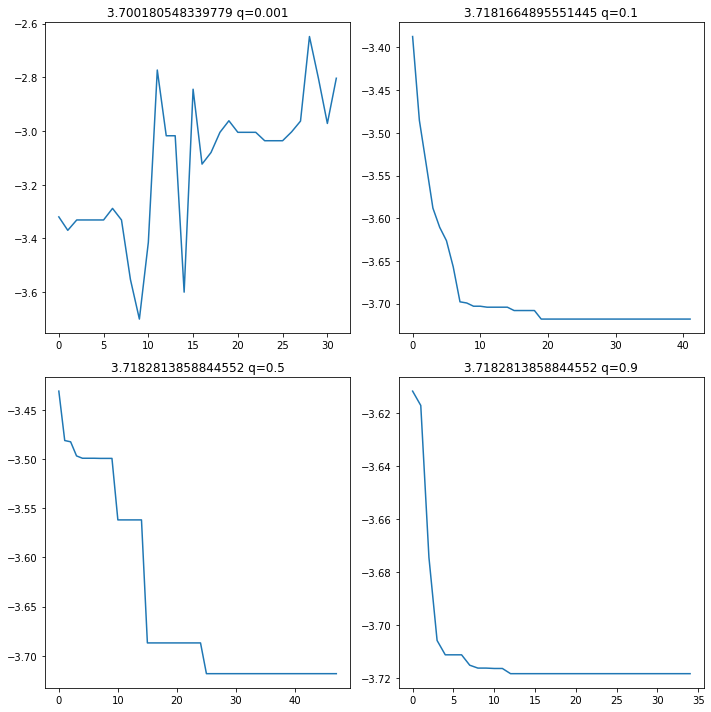

In [427]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(np.arange(len(hist1)), hist1)
axs[0, 0].set_title(str(res1[0]) + " q=0.001")
axs[0, 1].plot(np.arange(len(hist2)), hist2)
axs[0, 1].set_title(str(res2[0]) + " q=0.1")
axs[1, 0].plot(np.arange(len(hist3)), hist3)
axs[1, 0].set_title(str(res3[0]) + " q=0.5")
axs[1, 1].plot(np.arange(len(hist4)), hist4)
axs[1, 1].set_title(str(res4[0]) + " q=0.9")

fig.tight_layout()

In [218]:
x_ = np.linspace(a_x1, b_x1, 200)
y_ = np.linspace(a_x2, b_x2, 200)

xx, yy = np.meshgrid(x_, y_)
zz = f(xx, yy)

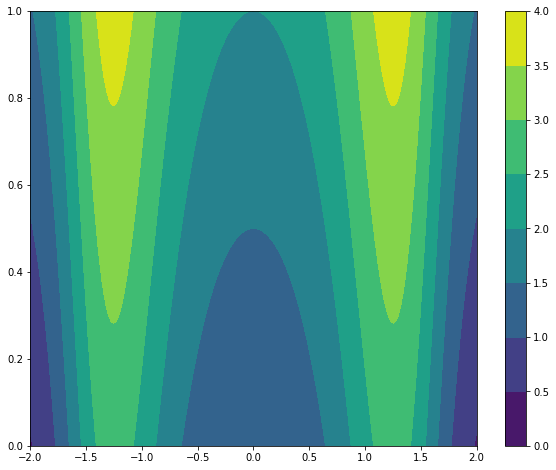

In [219]:
fig = plt.figure(figsize=(10,8))
plt.contourf(xx, yy, zz)
plt.colorbar()